# Magnetotellurics

In this section we discuss how to solve the PDE for 2D magnetotellurics (MT) due to a variation of
the electric conductivity $\sigma$ in the subsurface using `esys.escript`. It is assumed that you have 
worked through the [introduction section on `esys.escript`](escriptBasics.ipynb). 
First we will provide the basic theory:

## References


- [Chave, A. D., & Jones, A. G. (Eds.) (2012). The magnetotelluric method: Theory and practice. New York: Cambridge University Press. ](https://doi.org/10.1017/CBO9781139020138)
- [R. Schaa, L. Gross, J. du Plessis: “PDE-based geophysical modelling using Finite Elements: examples from 3-D resistivity and 2-D magnetotellurics”, 2016, Journal of Geophysics and Engineering, 13, S59-73](https://doi.org/10.1088/1742-2132/13/2/S59)
- [Niwas, S., Gupta, P.K. & Gaur, V.K. J Earth Syst Sci (2005) 114: 523. https://doi.org/10.1007/BF02702028](https://doi.org/10.1007/BF02702028)


## Maxwell's Equations in 2D

In this prac we are investigating the magnetotellurics (MT) method. The MT
is targeting to recover the distribution of the electric conductivity $\sigma$ (in [S/m]) in the subsurface.
It is an electro-magnetic method (EM) using natural sources of electro-magnetic fields a very low 
frequency which allows to target very deep targets ($>50km$) but at low resolution. 
Here we will focus on the case of $H$−polarisation (also known as TM mode). 
In this case it is assumed that the incoming magnetic field is polarized in direction $x$ perpendicular to the 
$yz$ plane of investigation. There is also the case of $E$ polarization (also known as TE mode) 
where the electric field polarized in the direction $x$.   

For the TM mode the modeling equations are given as the a 2D simplification of the Maxwell's equations.
For the given transversal magnetic field $H_x$ the vertical and 
horizontal components $E_z$ and $E_y$ of the electric field are given as 
\begin{equation}\label{eqTMEz}
\frac{\partial H_x}{\partial y }= - \sigma E_z
\end{equation} 
\begin{equation}\label{eqTMEy}
\frac{\partial H_x}{\partial z }=  \sigma E_y
\end{equation} 
The horizontal components then need to fulful the equation:
\begin{equation}\label{eqMaxwell}
\frac{\partial E_z}{\partial y }  - \frac{\partial E_y}{ \partial z } = - \mathbf{j} \omega \mu_0 H_x
\end{equation}
where $\mathbf{j}$ is the complex unity, $\omega$ is the angular frequency ([Hz]) 
and $\mu_0= 4 \pi \cdot 10^{-7} \frac{N}{A^2}$ is the magnetic constant.

## Impedance

Field observations will deliver impedance as function of 
angular frequency $\omega$. In the TM mode the impedance is given as 
\begin{equation}\label{eqImp}
Z_{yx}(\omega)=\frac{E_y}{H_x}
\end{equation}
This is a complex number. For interpretation an alternative representation
based on apparent resistivity $\rho_a$ and phase $\phi$ is commonly used. 
These quantities are derived from the impedance $Z_{yx}$ as
\begin{equation}\label{eqRhoa}
\rho_a(\omega) =\frac{1}{\omega \mu_0} |Z_{yx}(\omega)|^2
\end{equation}
and 
\begin{equation}\label{eqPhase}
\phi((\omega)= \arctan( \frac{Z_{yx}(\omega).imag}{Z_{yx}(\omega).real})
\end{equation}
For constant conductivity $\sigma$. 
the apparent resistivity and the phase are frequency independent 
and calculate as 
\begin{equation}\label{eqRhoaHH}
\rho_a(\omega) =\frac{1}{\sigma}
\end{equation}
and 
\begin{equation}\label{eqPhaseHH}
\phi((\omega)= 45^o
\end{equation}

##  TM-mode in `esys-escript`

Now we need to define the PDE using the  `LinearSinglePDE` PDE template PDE. We work in the $x_0=y$
and $x_1=z$ coordinate system. 

Here we restate the template: When $u$ is the unknown
we define the so-called flux vector $\mathbf{F}$ which is in essence the negative gradient of the solution 
times some matrix $\mathbf{A}$:
\begin{equation} \label{EQESYSFLUX}
\mathbf{F} = - \mathbf{A} \mathbf{\nabla} u + \mathbf{X}
\end{equation} 
with matrix $\mathbf{A}$ and vector  $\mathbf{X}$
The flux vector $\mathbf{F}$ needs to fulfill the conservation equation : 
\begin{equation}\label{EQESYSCONSERVATION}
\mathbf{\nabla}^t \; \mathbf{F} + D \; u = Y 
\end{equation}
where $D$ is a scalar and $Y$ is the right hand side. 

The Maxwell equation \eqref{eqMaxwell} in the $x_0,x_1$-coordinates reads as
\begin{equation}\label{eqMaxwell2}
\frac{\partial E_z}{\partial x_0}  - \frac{\partial E_y}{ \partial x_1 } + \mathbf{j} \omega \mu_0 H_x =0
\end{equation}
from which we can identfiy the $D=\mathbf{j} \omega \mu_0$ and $Y=0$ and the flux
\begin{equation}\label{EQFLUX1}
\mathbf{F} = 
\begin{bmatrix}
 F_0 \\
 F_1
\end{bmatrix}
= \begin{bmatrix}
 E_z \\
 -E_y
\end{bmatrix}
\end{equation}
The unknown of the problem becomes $u=H_x$ and 
using \eqref{eqTMEz} and \eqref{eqTMEy}
hence the flux is given as 
\begin{equation}\label{EQFLUX2}
\mathbf{F} = 
\begin{bmatrix}
 - \frac{1}{\sigma} \frac{\partial H_x}{\partial y } \\
 - \frac{1}{\sigma} \frac{\partial H_x}{\partial z } 
\end{bmatrix}
= - 
\begin{bmatrix}
\frac{1}{\sigma} \frac{d u}{d x_0} & + & 0 \frac{d u}{d x_1}\\
0 \frac{d u}{d x_0} & + & \frac{1}{\sigma} \frac{d u}{d x_1}
\end{bmatrix}
\end{equation} 
This gives the matrix $\mathbf{A}$
\begin{equation}
\begin{bmatrix}
A_{00} & A_{01} \\
A_{10}  & A_{11} 
\end{bmatrix}= 
\begin{bmatrix}
\frac{1}{\sigma} & 0  \\
0  & \frac{1}{\sigma} 
\end{bmatrix}
\end{equation}
and  $\mathbf{X}=0$.

## Example Problem: Transects over a conductive Step 

We consider a step of a conductive media ($\sigma_1=0.1$) within a resistive media ($\sigma_0=0.001$)
and want to calculate the distribution of the impedance along the surface. The step size is $3km$
and the top of the conductive layer is located at depth $h_1=5km$.
Use a domain of horizontal extend of $40km$ and depth of $80km$ with a grid spacing of $200m$.
Plot the profile of the apparent resistivity and the phase for frequencies $f=0.01, 0.3, 10 Hz$.

 <img src="MTImage1.png" alt="MT domain" width="500"> 

In [1]:
NEy=200
NEz=400
dx=200   # [m] grid spacing
Ly=dx*NEy
Lz=dx*NEz
print("Domain dimension = %d x %d m"%(Ly, Lz))

sigma1=0.001
sigma2=0.1
h1=5000.
h2=10000.

import numpy as np
Mu0=4*np.pi*1e-7

#%matplotlib notebook

Domain dimension = 40000 x 80000 m


As before the first step is to set up the domain:

In [2]:
from esys.escript import *
from esys.finley import Rectangle

domain=Rectangle(n0=NEy, n1=NEz, l0=Ly, l1=Lz)

Then we initiate the PDE we need to solve for $u=H_x$. We need to tell the `LinearSinglePDE` that the 
PDE has coefficients with complex values:

In [3]:
from esys.escript.linearPDEs import LinearSinglePDE
pde=LinearSinglePDE(domain, isComplex=True)

In general `esys.escript` tries to use iterative solvers for the discrete version of the PDE as this
less memory demanding and in many cases very fast.
In this particular application case we want make sure that a direct solver is used as due to the complex $D$ the
PDE is not necessarily suitable for an iterative solver:  

In [4]:
from esys.escript.linearPDEs import SolverOptions
pde.getSolverOptions().setSolverMethod(SolverOptions.DIRECT)

The magnetic field is set to one at the top of the domain. As before we use 
`q` to describe the location at which the $u=H_x$ is prescribed namely at $x_1=z=Lz$. 
To set the actual value we use `r`. So far we always set the solution to zero and - as this is the default assumption - we did not to set a value (potentially a `Data` object) for `r`:

In [5]:
x=domain.getX()
pde.setValue(r=1., q=whereZero(x[1]-Lz))

The PDE coefficient `D` is obvious from \eqref{eqMaxwell2}. We pick a frequency of $f=1Hz$.

In [6]:
f=1. # Hz
pde.setValue(D=1j*2*np.pi*f*Mu0)

Setting the conductivity distribution needs a bit of thinking. We first introduce 
to masks; `m1` which is one for locations below $L_z-h_1$ for the step of
the left side and `m2` which is one for locations below $L_z-h_2$ for the step of
the right side:

In [7]:
X=Function(domain).getX()
m1=whereNegative(X[1]-(Lz-h1))
m2=whereNegative(X[1]-(Lz-h2))

As said `m1` is used on the left part of the domain where $x_0<\frac{Ly}{2}$ while on
the other side `m2` is used. We use an additional mask `mH` to separate the two sides: 

In [8]:
mH=whereNegative(X[0]-Ly/2)
m=m1*mH+m2*(1-mH)

Now we have a mask `m` which is has value one for the step basement. This allows us to set the 
conductivity `SigmaS`:

In [9]:
sigmaS=sigma1*(1-m)+sigma2*m

Let's take a look at `sigmaS`. To reduce the calculation time for the rendering  `sigmaS` is interpolated 
from integration points to element centers prior to visualization.

In [10]:
sigmaS_np=convertToNumpy(interpolate(sigmaS, ReducedFunction(domain)))
x_np=convertToNumpy(ReducedFunction(domain).getX())

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.tricontourf(x_np[0], x_np[1], sigmaS_np[0], 15)
plt.xlabel('y [m]')
plt.ylabel('z [m]')
plt.title("Conductivity distribution")
plt.colorbar()

Ready to set the `A` coefficient:

In [11]:
pde.setValue(A=1./sigmaS*kronecker(domain)) 

Now we can get the solution $u=H_x$:

In [12]:
Hx=pde.getSolution()
print(abs(Hx))

Summary: inf=1.55785e-20 sup=1 data points=80601


Impedance is obtained from the definition. We look at the value at element centers.

In [13]:
Ey=1./sigmaS*grad(Hx, ReducedFunction(domain))[1]
Zyx=Ey/Hx

rho_a=1./(2*np.pi*f*Mu0)*abs(Zyx)**2
phi=phase(Zyx)

Let's plot the distribution of the apparent resistivity:

[[  7.11504064e-02   7.11546515e-02   7.11631519e-02 ...,   7.42011714e+02
    7.42027449e+02   7.42035311e+02]]


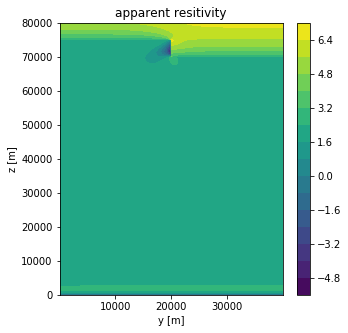

In [14]:
rho_a_np=convertToNumpy(rho_a)
x_np=convertToNumpy(rho_a.getFunctionSpace().getX())
print(rho_a_np)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.tricontourf(x_np[0], x_np[1], log(rho_a_np[0]), 15)
plt.xlabel('y [m]')
plt.ylabel('z [m]')
plt.title("log of apparent resitivity")
plt.colorbar()

Field data are collected along transects at the surface. Lets plot the apparent resistivity and 
phase along the surface. 
We first define a `Locator` for the points at/near the surface:

In [15]:
from esys.escript.pdetools import Locator
locations_in_transect=[]
for k in range(NEy): 
    x_t=dx*k+dx/2.
    locations_in_transect.append( [x_t, Lz ] ) 
locator_transect=Locator(where=ReducedFunction(domain), x=locations_in_transect)

Get the horizontal locations along the transect (just in case they have changed):

In [16]:
transect_x=[ x[0] for x in locator_transect.getX()]

Grab the values for apparent resistivity and phase and then plot

In [17]:
rho_a_x=locator_transect(rho_a)
phi_x=locator_transect(phi*180/np.pi)

Text(0.5,1,'Resistivity vs offset')

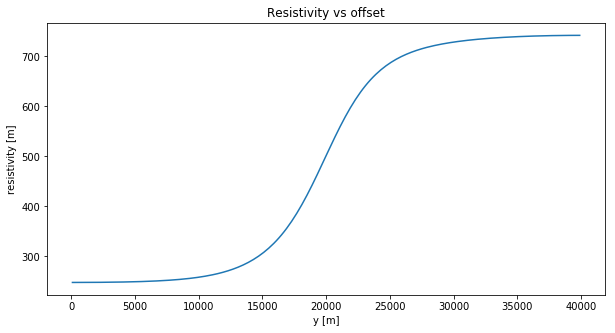

In [18]:
plt.figure(figsize=(10,5))
plt.clf()
plt.plot(transect_x,rho_a_x)
plt.xlabel('y [m]')
plt.ylabel('resistivity [m]')
plt.title("Resistivity vs offset")

Text(0.5,1,'Phase vs offset')

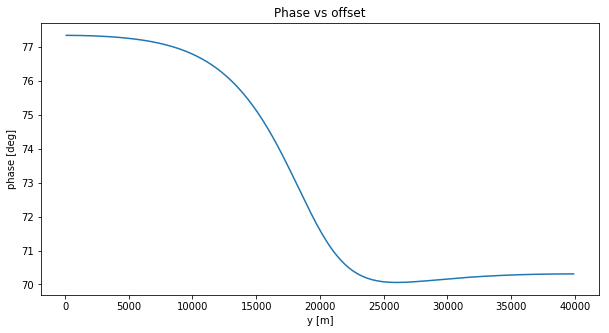

In [19]:
plt.figure(figsize=(10,5))
plt.clf()
plt.plot(transect_x,phi_x)
plt.xlabel('y [m]')
plt.ylabel('phase [deg]')
plt.title("Phase vs offset")